In [33]:
from dpm.transforms import Transform, InverseTransform, Radial, Planar, Identity
from dpm.distributions import Normal, Uniform, TransformDistribution
from dpm.criterion import cross_entropy
from dpm.train import train
from dpm.visualize import plot_contour, plot_hist, plot_stats
from dpm.utils import integrate
import torch

In [26]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [Radial(2)
                               for _ in range(32)])



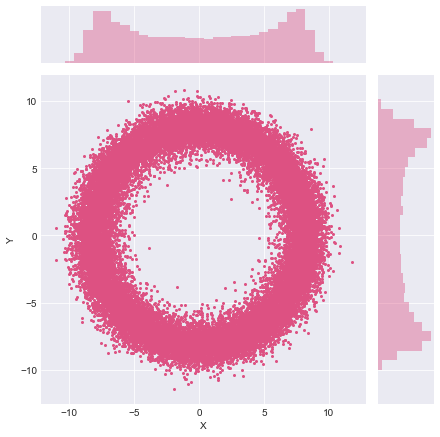

In [27]:
samples = model.sample(30000).detach()
plot_hist(samples)
# plot_contour(model, rng=(-2, 2))

In [28]:
# integrate(model, rng=(-1, 1), n_points=1000000)

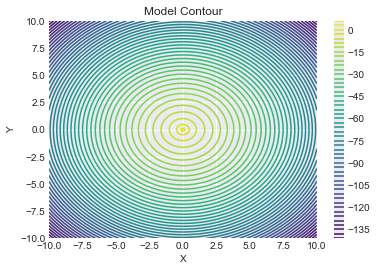

In [35]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [InverseTransform(Radial(2))
                               for _ in range(32)])


plot_contour(model, rng=(-10, 10))

In [36]:
from dpm.train import train
from dpm.criterion import cross_entropy
from dpm.distributions import Data

In [37]:
p = Data(samples)

In [38]:
stats = train(p, model, cross_entropy, epochs=2000, log_interval=100, track_parameters=False)

[Epoch 0/2000]	Loss 57.90
[Epoch 100/2000]	Loss 5.31
[Epoch 200/2000]	Loss 5.35
[Epoch 300/2000]	Loss 5.17
[Epoch 400/2000]	Loss 5.22
[Epoch 500/2000]	Loss 5.24
[Epoch 600/2000]	Loss 5.24
[Epoch 700/2000]	Loss 5.03
[Epoch 800/2000]	Loss 5.24
[Epoch 900/2000]	Loss 5.15
[Epoch 1000/2000]	Loss 5.32
[Epoch 1100/2000]	Loss 5.23
[Epoch 1200/2000]	Loss 5.17
[Epoch 1300/2000]	Loss 5.27
[Epoch 1400/2000]	Loss 5.14
[Epoch 1500/2000]	Loss 5.15
[Epoch 1600/2000]	Loss 5.09
[Epoch 1700/2000]	Loss 5.07
[Epoch 1800/2000]	Loss 5.07
[Epoch 1900/2000]	Loss 5.18


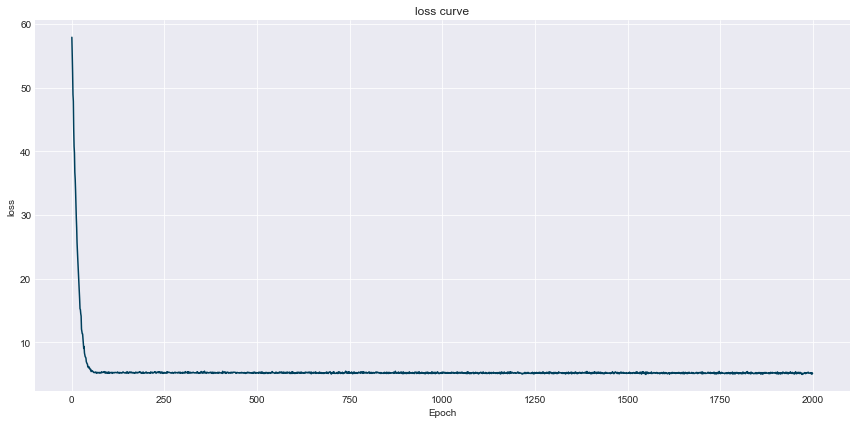

In [39]:
plot_stats(stats)

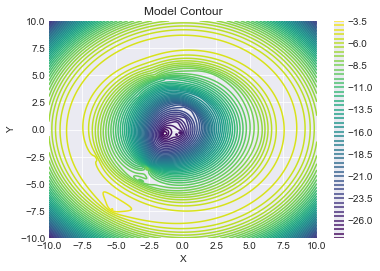

In [40]:
plot_contour(model, rng=(-10, 10))

In [57]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [InverseTransform(Planar(2))
                               for _ in range(4)])



In [60]:
stats = train(p, model, cross_entropy, epochs=1, log_interval=100, track_parameters=False)

[Epoch 0/1]	Loss 25.47


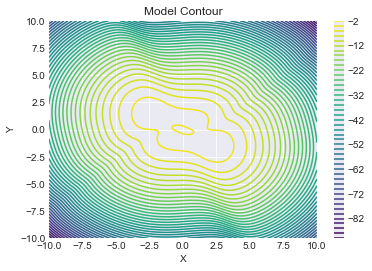

In [59]:
plot_contour(model, rng=(-10, 10))

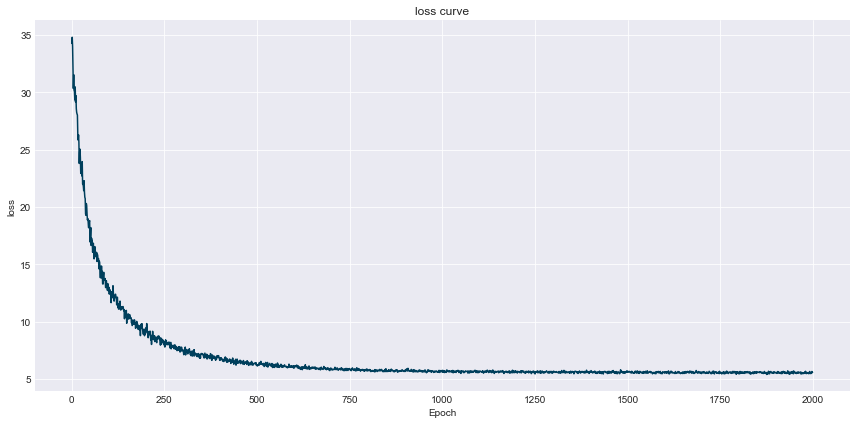

In [55]:
plot_stats(stats)

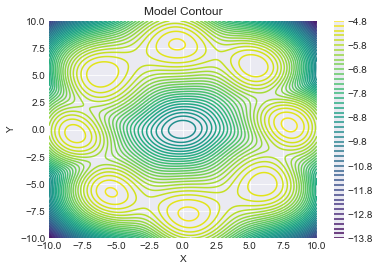

In [56]:
plot_contour(model, rng=(-10, 10))